# Machine Learning in Python - Project 1

Due Sunday, March 8th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("easyshare.csv")
d.head()

mergeid  int_year  wave  country  country_mod  female        age  \
0  AT-000674-01    2011.0   4.0     11.0         40.0     1.0  59.700001   
1  AT-001215-01    2011.0   4.0     11.0         40.0     1.0  72.599998   
2  AT-001492-01    2011.0   4.0     11.0         40.0     1.0  59.599998   
3  AT-001492-02    2011.0   4.0     11.0         40.0     0.0  59.799999   
4  AT-001816-01    2004.0   1.0     11.0         40.0     1.0  61.299999   

   birth_country  citizenship  isced1997_r  ...  bmi2  smoking  ever_smoked  \
0           40.0         40.0          5.0  ...   2.0      5.0          5.0   
1          528.0        528.0          5.0  ...   3.0      1.0          1.0   
2           40.0         40.0          3.0  ...   2.0      5.0          1.0   
3           40.0         40.0          4.0  ...   2.0      1.0          1.0   
4           40.0         40.0          3.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     NaN     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 23 columns]

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. European Union, Governments, Health Institutes and/or Charities on dementia and ageing). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mergeid        97372 non-null  object 
 1   int_year       97372 non-null  float64
 2   wave           97372 non-null  float64
 3   country        97372 non-null  float64
 4   country_mod    97372 non-null  float64
 5   female         97372 non-null  float64
 6   age            97372 non-null  float64
 7   birth_country  97170 non-null  float64
 8   citizenship    97281 non-null  float64
 9   isced1997_r    97372 non-null  float64
 10  eduyears_mod   84532 non-null  float64
 11  eurod          95838 non-null  float64
 12  bmi            94686 non-null  float64
 13  bmi2           94686 non-null  float64
 14  smoking        96887 non-null  float64
 15  ever_smoked    97116 non-null  float64
 16  br010_mod      79210 non-null  float64
 17  br015_         97113 non-null  float64
 18  casp  

In [5]:
# Generate descriptive statistics for numerical variables
descriptive_stats = d.describe()

# Check for missing values
missing_values = d.isnull().sum()

# Output the results
missing_values

mergeid            976
int_year           976
wave               976
country            976
country_mod        976
female             976
age                976
birth_country     1178
citizenship       1067
isced1997_r        976
eduyears_mod     13816
eurod             2510
bmi               3662
bmi2              3662
smoking           1461
ever_smoked       1232
br010_mod        19138
br015_            1235
casp             14283
chronic_mod       1065
sp008_           15173
ch001_            1420
cogscore           976
dtype: int64

In [13]:
# Assuming you have already loaded your data into DataFrame d
d = pd.read_csv("easyshare.csv")

# Remove rows with any NA values
dc = d.dropna()

In [7]:
descriptive_stats

int_year          wave       country   country_mod        female  \
count  97372.000000  97372.000000  97372.000000  97372.000000  97372.000000   
mean    2010.467537      3.794612     24.272080    384.954135      0.541480   
std        4.632490      2.146070     12.298221    229.261059      0.498279   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    300.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  97372.000000   97170.000000  97281.000000  97372.000000  84532.000000   
mean      67.938640     398.304456    391.759830      2.658916     10.427832   
std        8.864202     237.542164    232.965078      1.493547      4.264231   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.500000     208.000000    208.000000      1.000000      8.000000   
50%       66.599998     348.000000    348.000000      3.000000     11.000000   
75%       74.199997     642.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  94686.000000  96887.000000  97116.000000  79210.000000   
mean   ...      2.849788      4.341790      3.255282      3.345916   
std    ...      0.762833      1.483112      1.983651      2.244878   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  97113.000000  84065.000000  97283.000000  83175.000000  96928.000000   
mean       2.672248     36.744008      1.305922      3.978635      2.173335   
std        1.325228      6.463052      1.269872      1.744222      1.403437   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     32.000000      0.000000      1.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     42.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  97372.000000  
mean      11.973714  
std        4.184386  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

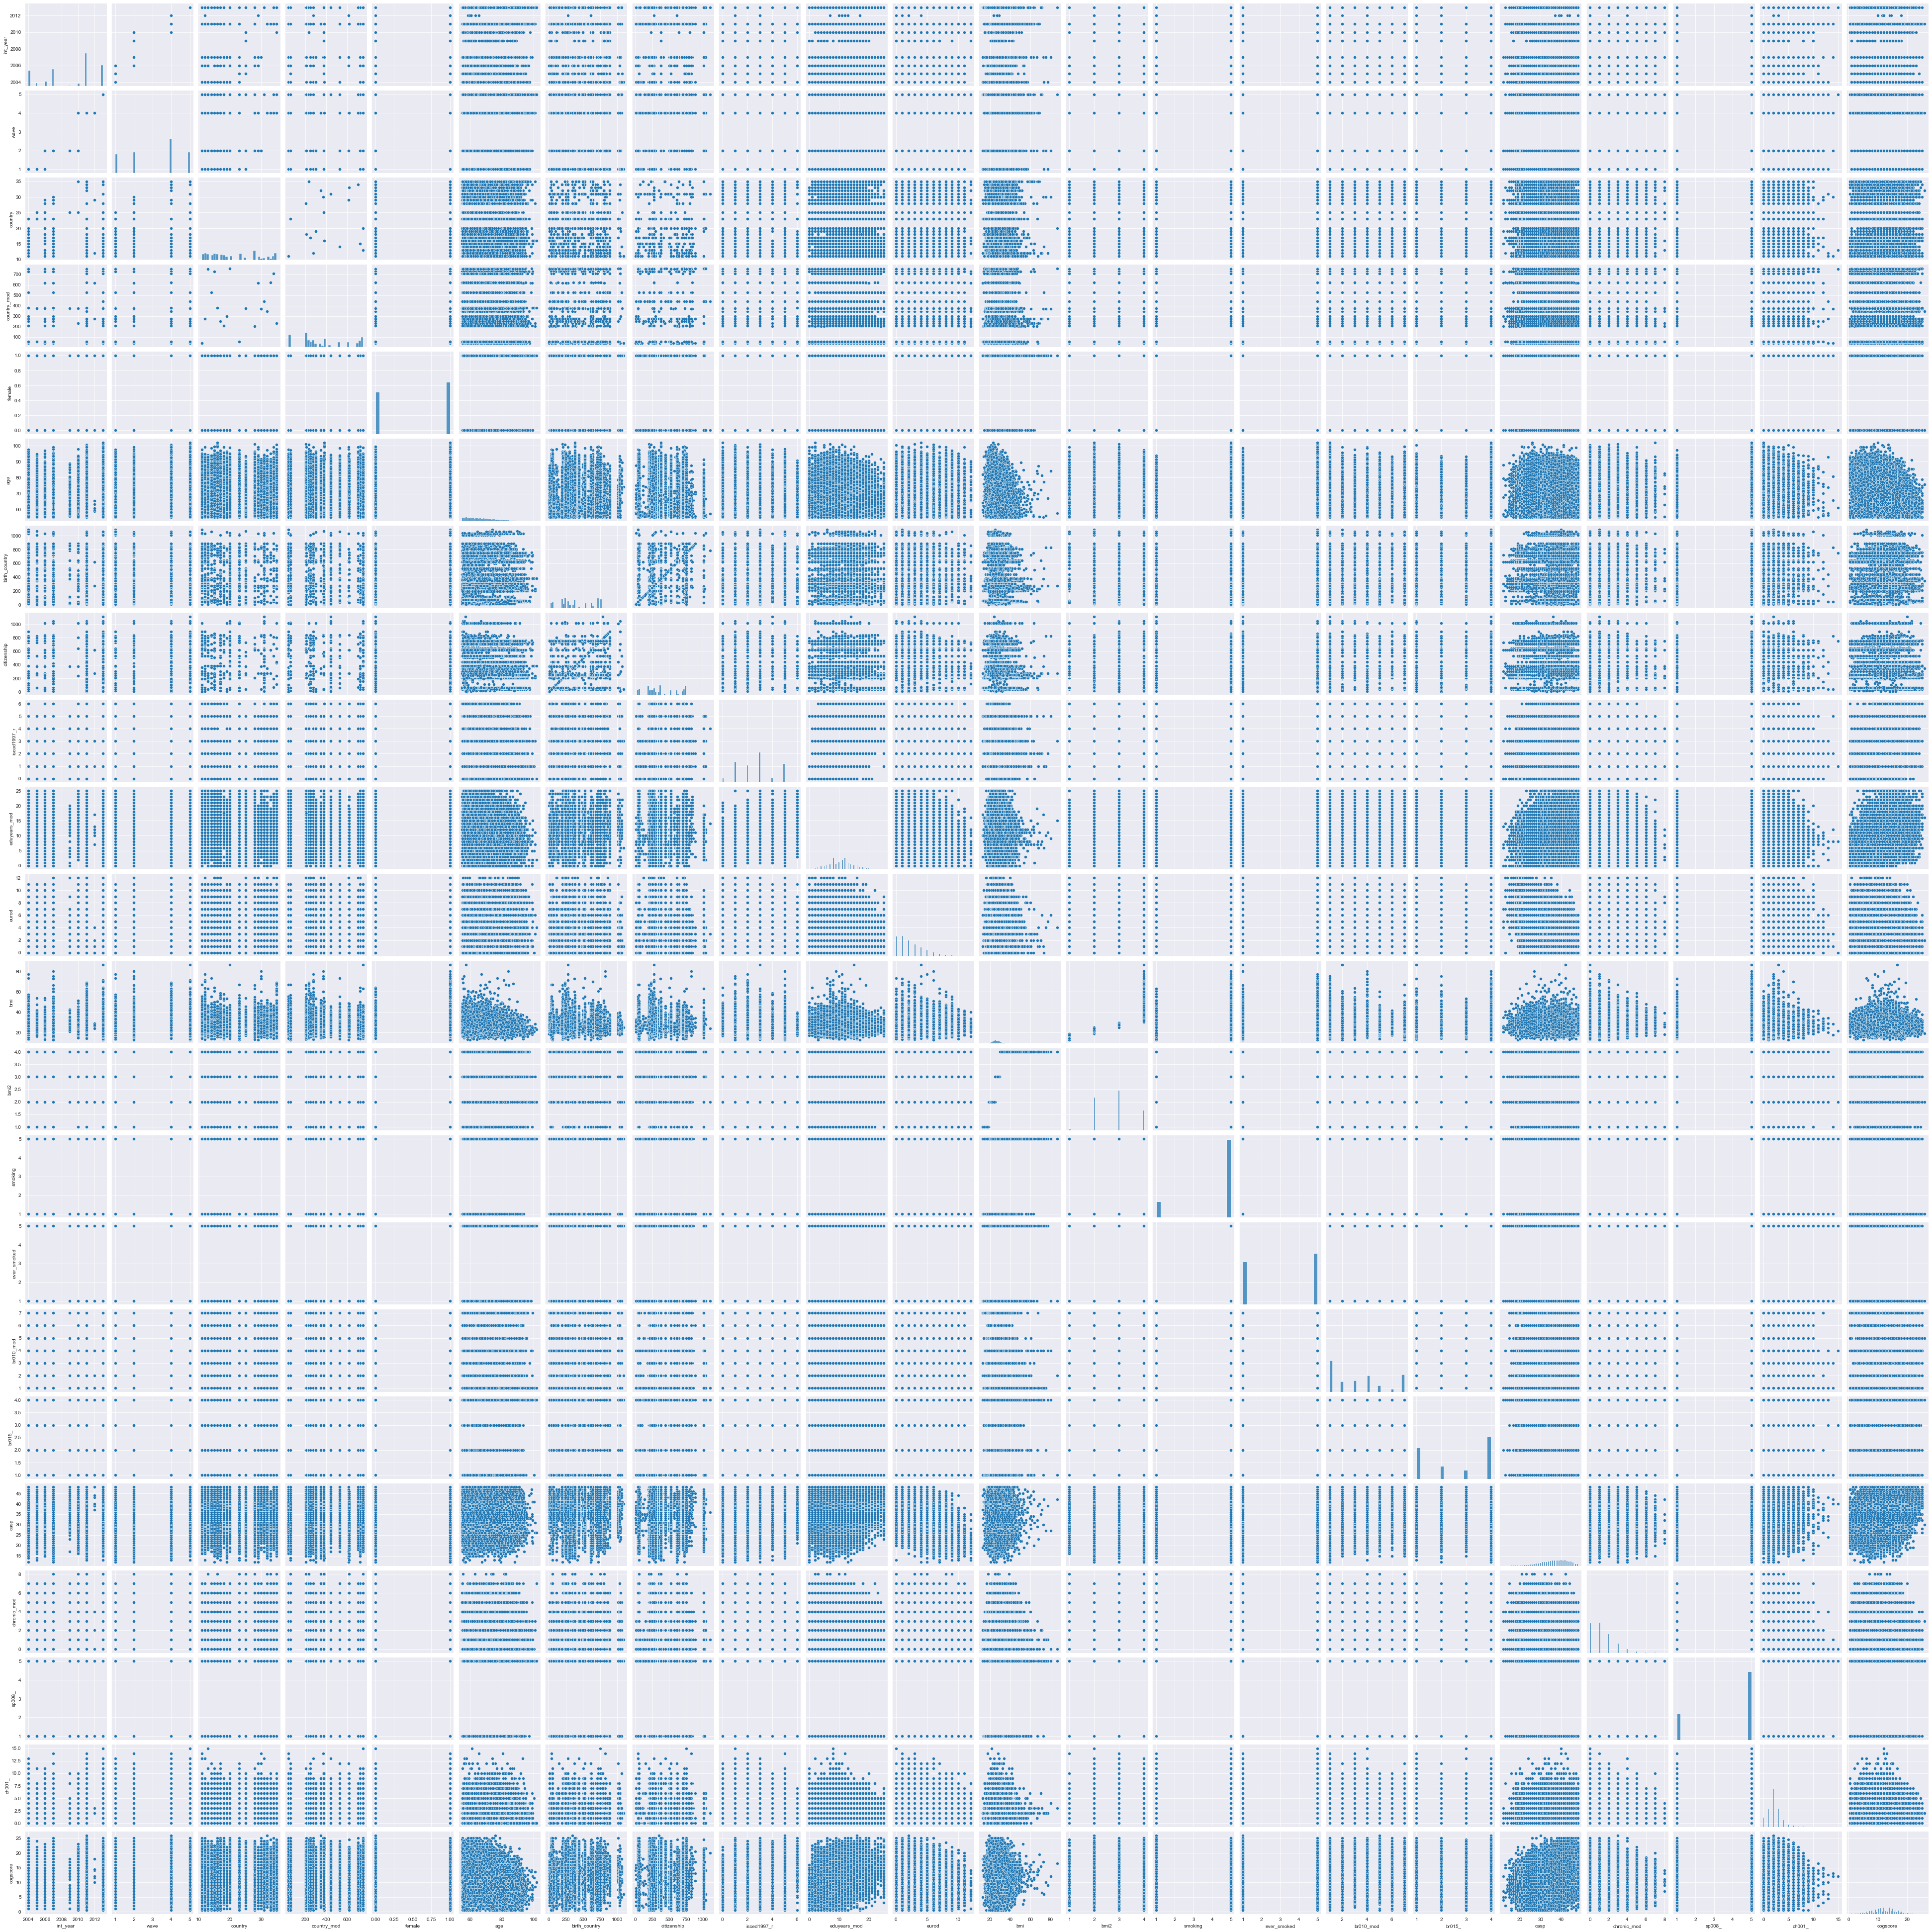

In [14]:
import seaborn as sns

sns.pairplot(dc.select_dtypes(include=['float64', 'int64']))

<ipython-input-15-732c9efe9a6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dc.corr()


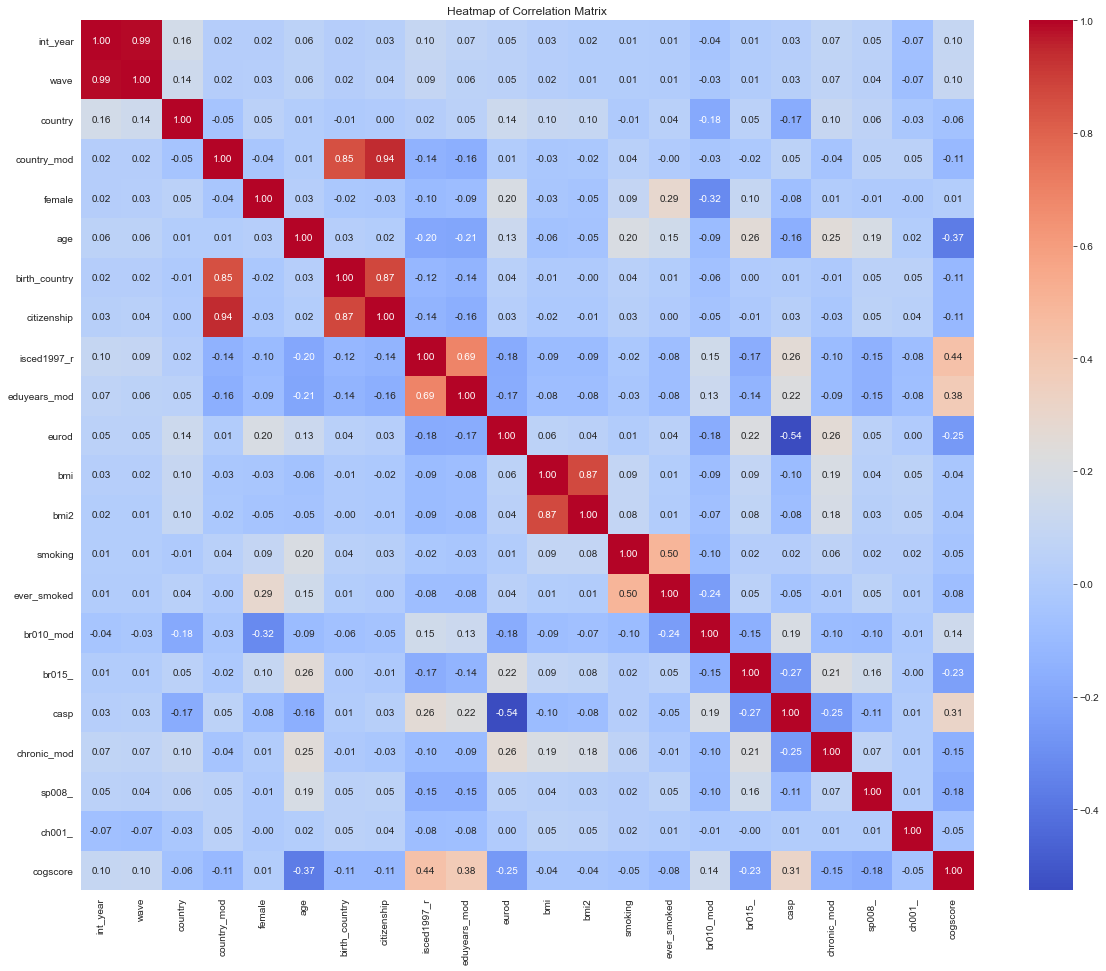

In [15]:
corr = dc.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

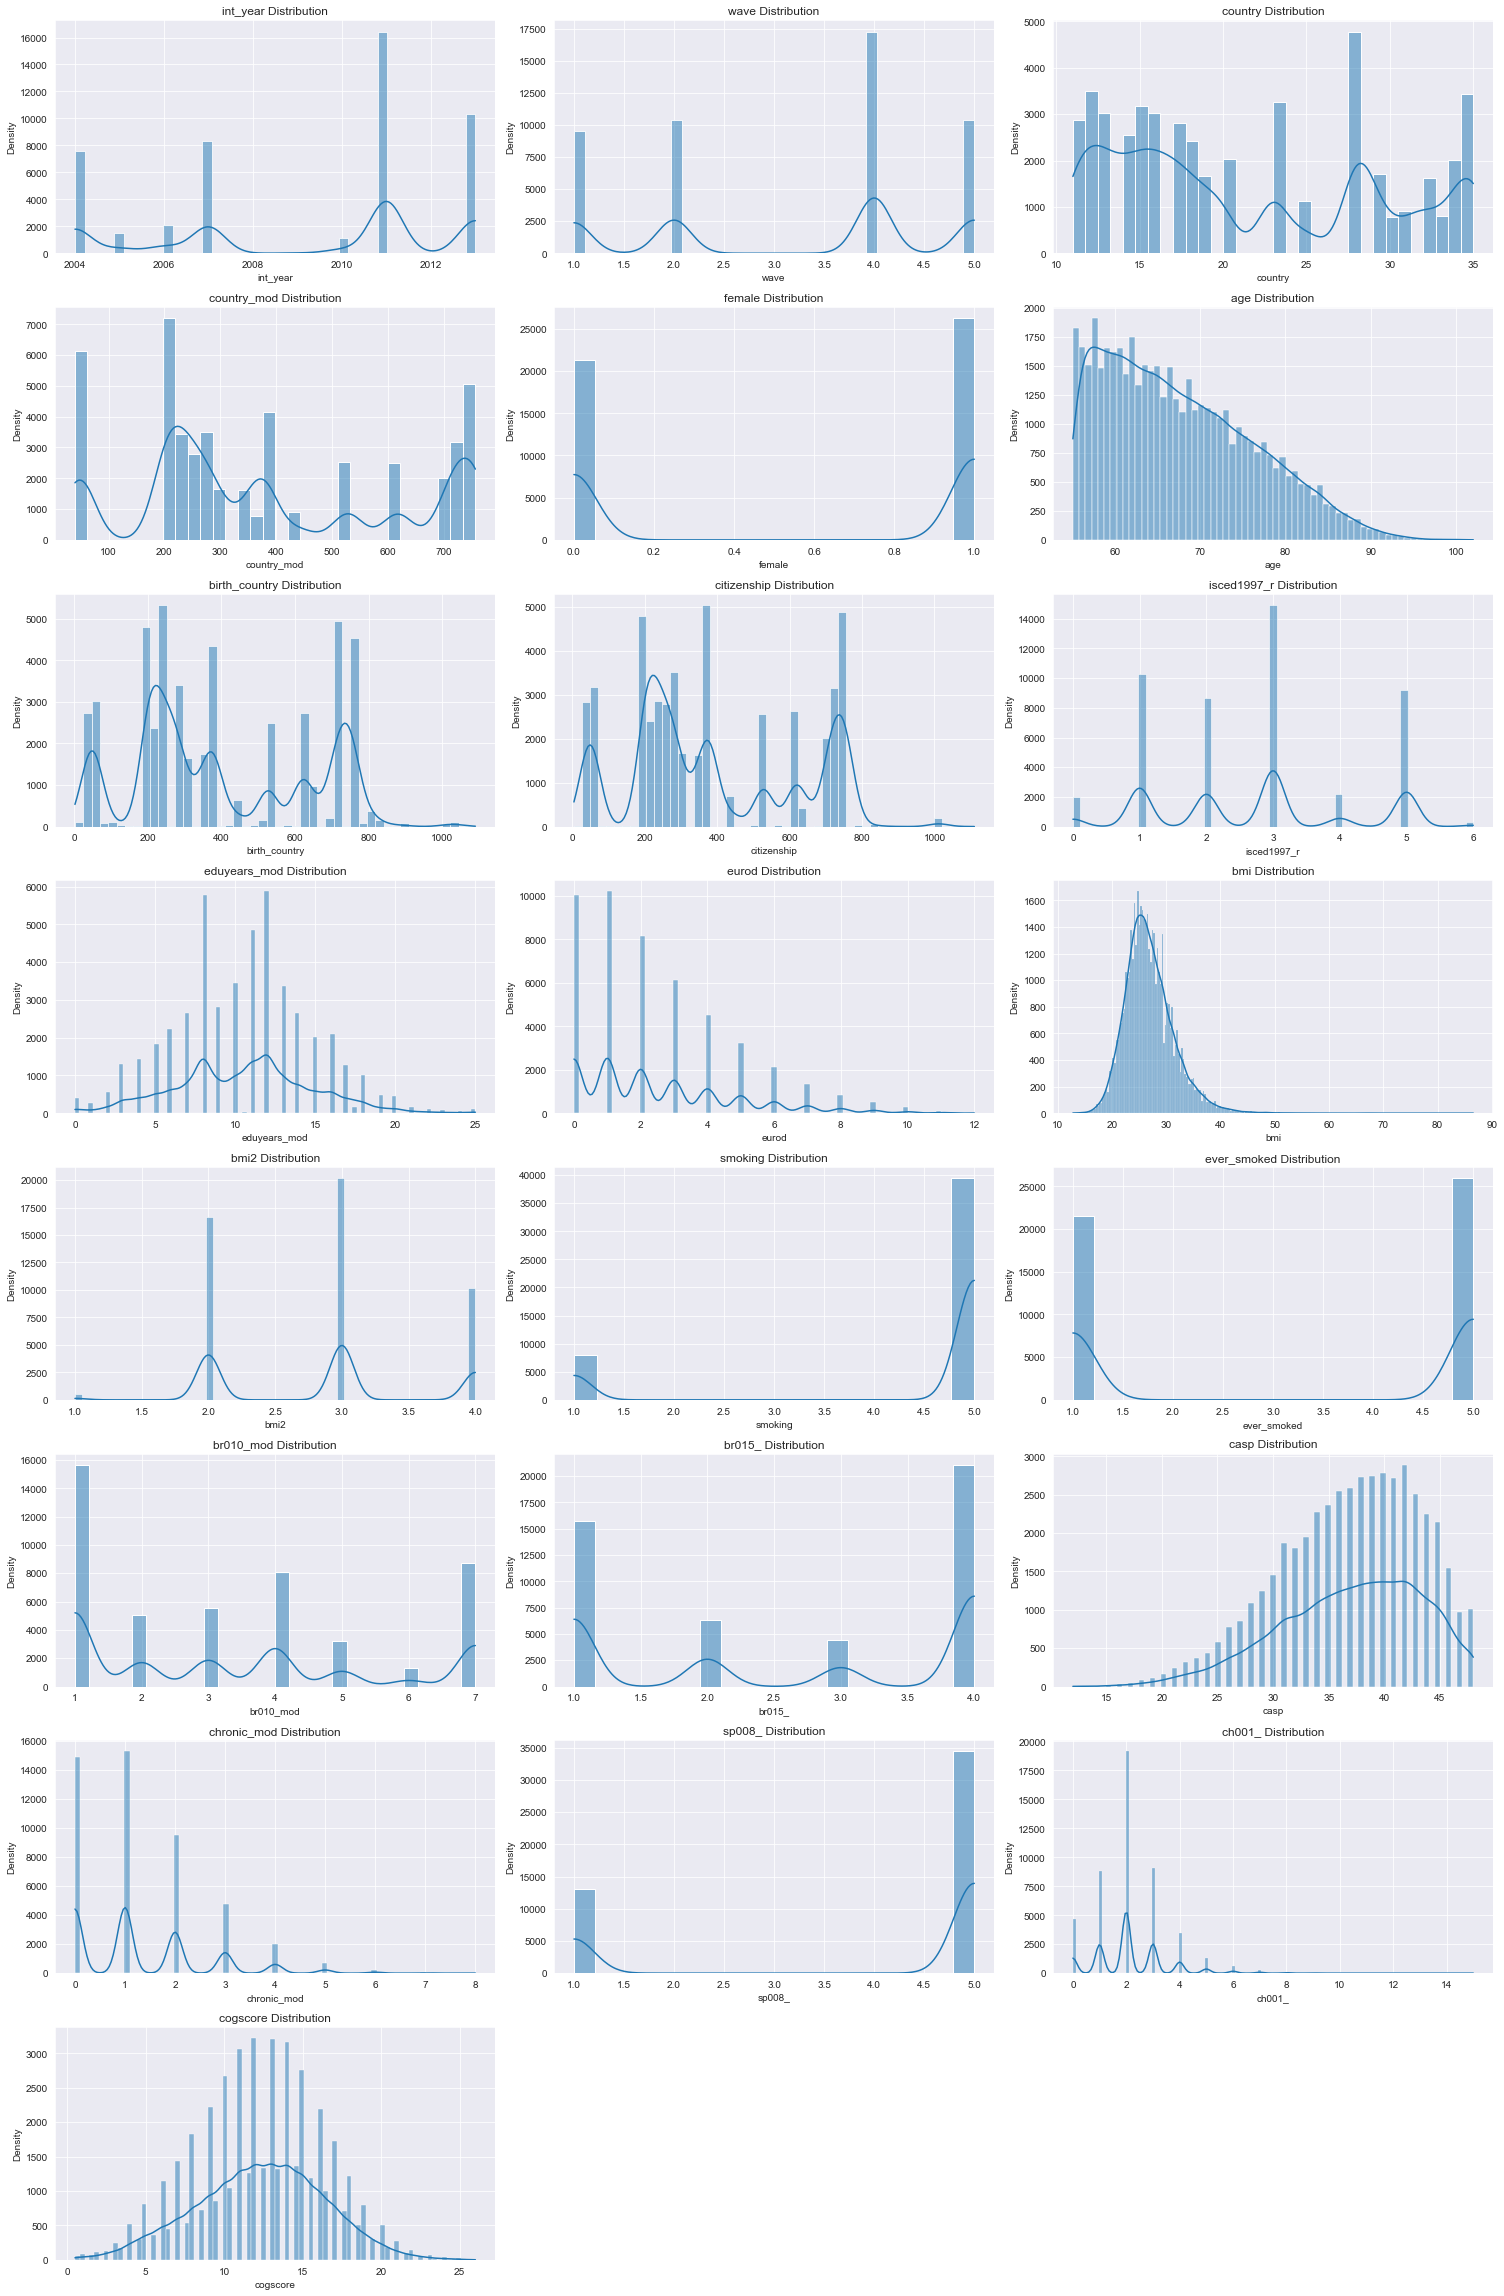

In [18]:
# Select numerical columns
num_cols = dc.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)
cols = 3  # Define the number of columns in your subplot grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate the required number of rows

plt.figure(figsize=(7 * cols, 4 * rows))  # Adjust the overall size of the subplot grid

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(dc[column].dropna(), kde=True)  # Using histplot instead of distplot
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [21]:
# Create a copy of the slice to avoid the SettingWithCopyWarning
dc = dc.copy()

# Now you can safely add a new column without getting a warning
dc['log_age'] = np.log(dc['age'] + 1)  # Adding 1 to avoid log(0)


<ipython-input-22-732c9efe9a6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dc.corr()


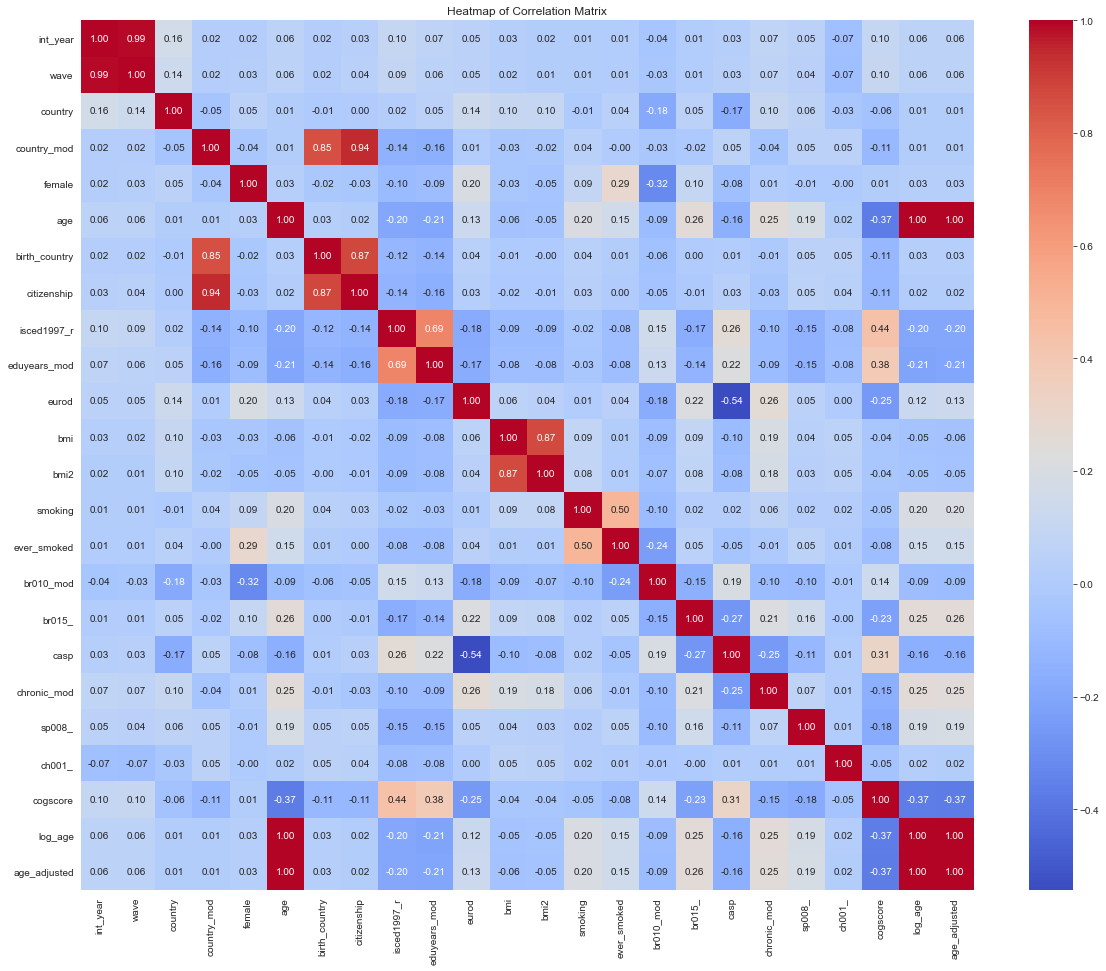

In [22]:
corr = dc.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb